In [1]:
import os

import torch
from PIL import Image
import numpy as np
from torchvision import transforms

In [2]:
def calculate_mean_std(root_dir):
    transform_to_tensor = transforms.ToTensor()
    num_pixels = 0
    total_sum = np.zeros(3)
    total_sum_squared = np.zeros(3)

    for dirpath, _, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.endswith('.jpg') or filename.endswith('.png'): # add more conditions if there are other image types
                filepath = os.path.join(dirpath, filename)
                with Image.open(filepath) as img:
                    img = img.convert('RGB')
                    tensor_img = transform_to_tensor(img)
                    total_sum = np.add(total_sum, (tensor_img.sum((1, 2))))  # sum over height and width dimensions
                    total_sum_squared = np.add(total_sum_squared, ((tensor_img ** 2).sum((1, 2))))  # sum over height and width dimensions
                    _, height, width = tensor_img.shape
                    num_pixels += height * width

    mean = total_sum / num_pixels
    std = np.sqrt((total_sum_squared / num_pixels) - (mean ** 2))
    return mean, std

In [3]:
mean, std = calculate_mean_std('./data')

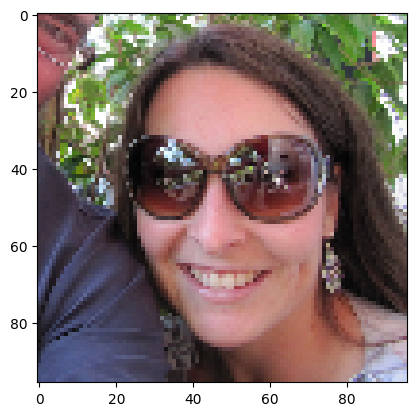

In [4]:
import matplotlib.pyplot as plt
from torchvision import transforms

img = Image.open('./data/happy/ffhq_13.png')
plt.imshow(img)

In [33]:
transform = transforms.Compose([
    transforms.Resize((96, 96)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

In [6]:
img_t = transform(img).unsqueeze(0).reshape(-1)
img_t.shape

torch.Size([784])

In [7]:
print(img_t.numpy().tolist())

[-0.37132126092910767, -0.44827800989151, -0.551547646522522, -0.008690720424056053, 0.5111968517303467, 1.3412048816680908, 1.0748876333236694, 1.1876411437988281, 0.990196168422699, 0.14981158077716827, 0.2762851417064667, 0.9837440252304077, 1.0360198020935059, 0.24142007529735565, 0.13200949132442474, 0.12851178646087646, 0.10355938971042633, 0.23769010603427887, -0.19653353095054626, 0.0333658866584301, 0.12715214490890503, 0.03422102332115173, -0.12521177530288696, -0.06504561007022858, 0.30908912420272827, 0.3156188428401947, 0.9061657190322876, 1.0083470344543457, -0.23567518591880798, -0.33723461627960205, -0.34360891580581665, 0.027922596782445908, 1.3712098598480225, 0.8401689529418945, 0.6101927757263184, 0.7384930849075317, 1.0609731674194336, 0.22140459716320038, 0.21872252225875854, 0.2174786925315857, 0.27978214621543884, -0.1105608195066452, -0.2706158459186554, -0.196884885430336, -0.05964483320713043, 0.0852133110165596, -0.18743903934955597, 0.15548624098300934, 0.1

In [73]:
import torch

image = Image.open('./patricio.jpeg')
image = np.array(image)

height, width, channels = image.shape
height_start = int((height / 2 - width / 2))
height_end = int((height / 2 + width / 2))

image_c = image[height_start:height_end, :, :]
scaling = 2
st = int(width/scaling - width/scaling)
en = int(width/scaling + width/scaling)
image_c = image[st:en, st:en, :]
image_t = transform(Image.fromarray(image_c))

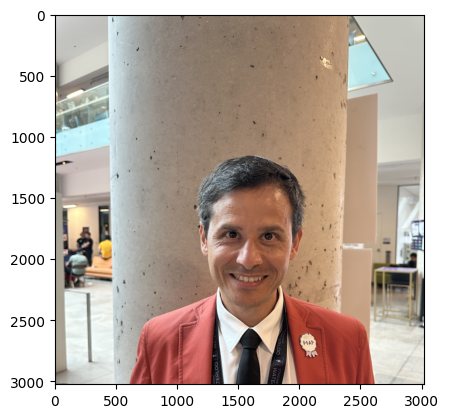

In [74]:
plt.imshow(image_c)

In [71]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=2)
model.load_state_dict(torch.load('./models/BestModel.pt', map_location='cpu'))

Loaded pretrained weights for efficientnet-b0


<All keys matched successfully>

In [75]:
model(image_t.unsqueeze(0)).max(1)

torch.return_types.max(
values=tensor([2.2823], grad_fn=<MaxBackward0>),
indices=tensor([0]))